In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten


In [ ]:
# Load the dataset
data = pd.read_csv("/content/Electric_Production (1).csv")

# Assuming the dataset has a 'Date' and 'Value' column, where 'Date' is the timestamp and 'Value' is the target variable.

# Convert 'Date' column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Sort the data by date
data = data.sort_values(by='DATE')

# Normalize the 'Value' column
scaler = MinMaxScaler()
data['IPG2211A2N'] = scaler.fit_transform(data['IPG2211A2N'].values.reshape(-1, 1))

In [ ]:
data.head()

,DATE,IPG2211A2N
0,1985-01-01,0.232017
1,1985-02-01,0.207274
2,1985-03-01,0.096304
3,1985-04-01,0.029104
4,1985-05-01,0.000000


In [ ]:


# Define a sequence length (number of time steps to consider)
sequence_length = 10  # You can adjust this based on your problem's requirements

# Create sequences and labels
sequences = []
labels = []

for i in range(len(data) - sequence_length):
    sequences.append(data['IPG2211A2N'][i:i + sequence_length].values)
    labels.append(data['IPG2211A2N'][i + sequence_length])

# Convert to NumPy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)


In [ ]:
print(sequences)
print(labels)

[[0.23201741 0.20727443 0.09630353 ... 0.10707831 0.07112325 0.0135012 ]
 [0.20727443 0.09630353 0.02910391 ... 0.07112325 0.0135012  0.03624525]
 [0.09630353 0.02910391 0.         ... 0.0135012  0.03624525 0.18085375]
 ...
 [0.80355839 0.59623672 0.61715056 ... 0.72366469 0.58443076 0.51692206]
 [0.59623672 0.61715056 0.44591758 ... 0.58443076 0.51692206 0.56716116]
 [0.61715056 0.44591758 0.49622822 ... 0.51692206 0.56716116 0.80181321]]
[0.03624525 0.18085375 0.24282188 0.17103322 0.09322483 0.02318541
 0.00672968 0.06188984 0.14105065 0.12372165 0.07673671 0.02992454
 0.05434764 0.17303755 0.24969868 0.19904116 0.13895184 0.06537346
 0.04802692 0.11576103 0.18294446 0.1991073  0.11877494 0.06834688
 0.09649384 0.20600164 0.33142529 0.28137649 0.20215631 0.10694199
 0.08221656 0.15919352 0.23844745 0.27602217 0.16466661 0.10754666
 0.13217357 0.25034519 0.30508559 0.28839501 0.24345084 0.13217762
 0.11302651 0.17758339 0.25259921 0.26629478 0.18882787 0.14250834
 0.18566009 0.389795

In [ ]:
data.head()

,DATE,IPG2211A2N
0,1985-01-01,0.232017
1,1985-02-01,0.207274
2,1985-03-01,0.096304
3,1985-04-01,0.029104
4,1985-05-01,0.000000


In [ ]:
# CNN-LSTM1 model
model1 = Sequential()
model1.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
model1.add(Conv1D(64, kernel_size=2, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(LSTM(64))
model1.add(Dense(1, activation='linear'))  # You can adjust the activation function

model1.compile(optimizer='adam', loss='mean_squared_error')  # You can choose an appropriate loss function

# CNN-LSTM2 model
model2 = Sequential()
model2.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
model2.add(Conv1D(128, kernel_size=2, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(LSTM(200))
model2.add(Dense(32, activation='relu'))  # You can adjust the activation function
model2.add(Dense(1, activation='linear'))  # You can adjust the activation function

model2.compile(optimizer='adam', loss='mean_squared_error')  # You can choose an appropriate loss function



In [ ]:
# Train CNN-LSTM1
model1.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate CNN-LSTM1
loss1 = model1.evaluate(X_test, y_test)

# Train CNN-LSTM2
model2.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate CNN-LSTM2
loss2 = model2.evaluate(X_test, y_test)

print("CNN-LSTM1 Test Loss:", loss1)
print("CNN-LSTM2 Test Loss:", loss2)


Epoch 1/50
4/4 [==============================] - 7s 396ms/step - loss: 0.2103 - val_loss: 0.1107
Epoch 2/50
4/4 [==============================] - 0s 46ms/step - loss: 0.0850 - val_loss: 0.0233
Epoch 3/50
4/4 [==============================] - 0s 35ms/step - loss: 0.0201 - val_loss: 0.0294
Epoch 4/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0357 - val_loss: 0.0367
Epoch 5/50
4/4 [==============================] - 0s 47ms/step - loss: 0.0280 - val_loss: 0.0161
Epoch 6/50
4/4 [==============================] - 0s 48ms/step - loss: 0.0176 - val_loss: 0.0148
Epoch 7/50
4/4 [==============================] - 0s 62ms/step - loss: 0.0202 - val_loss: 0.0171
Epoch 8/50
4/4 [==============================] - 0s 26ms/step - loss: 0.0208 - val_loss: 0.0150
Epoch 9/50
4/4 [==============================] - 0s 31ms/step - loss: 0.0177 - val_loss: 0.0135
Epoch 10/50
4/4 [==============================] - 0s 27ms/step - loss: 0.0158 - val_loss: 0.0149
Epoch 11/50
4/4 [===========

In [ ]:
# Use the trained models to make predictions
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
# Inverse transform the predictions
y_pred1 = scaler.inverse_transform(y_pred1)
y_pred2 = scaler.inverse_transform(y_pred2)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


3/3 [==============================] - 0s 7ms/step


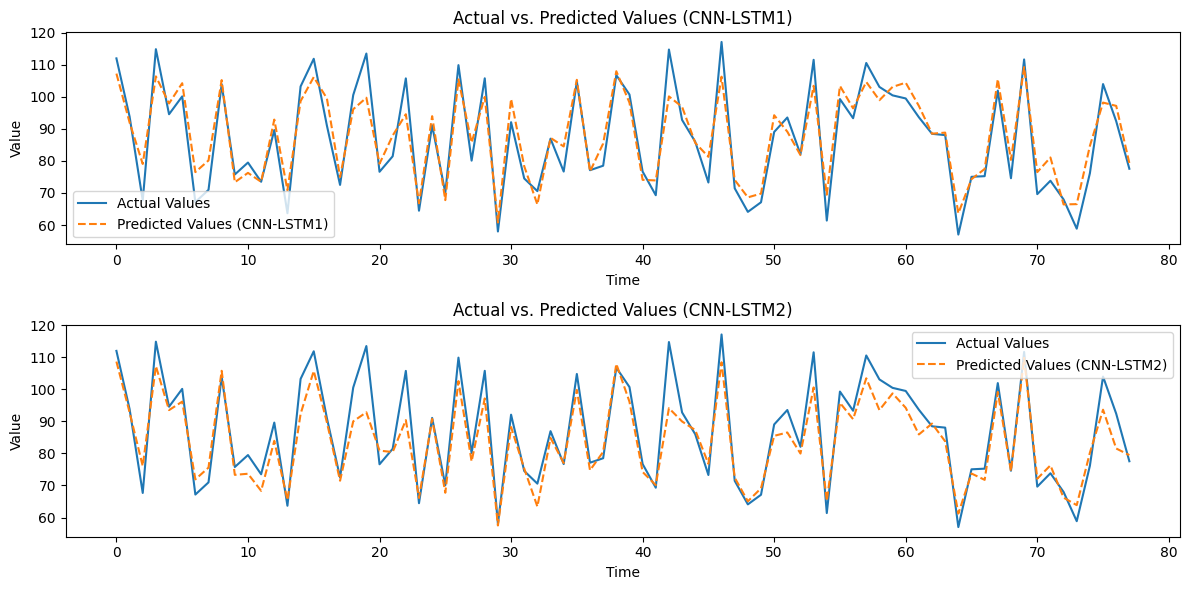

In [ ]:
# Plot the results for CNN-LSTM1
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred1, label='Predicted Values (CNN-LSTM1)', linestyle='--')
plt.title('Actual vs. Predicted Values (CNN-LSTM1)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Plot the results for CNN-LSTM2
plt.subplot(2, 1, 2)
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred2, label='Predicted Values (CNN-LSTM2)', linestyle='--')
plt.title('Actual vs. Predicted Values (CNN-LSTM2)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv("/content/Electric_Production (1).csv")

# Assuming the dataset has a 'Date' and 'Demand' column
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.sort_values(by='DATE')

In [ ]:
# Use the 'Demand' column as the time series
time_series = df['IPG2211A2N']

# Split the data into training and testing sets
train_size = int(len(time_series) * 0.8)
train, test = time_series[0:train_size], time_series[train_size:]

# Fit ARIMA model
order = (5,1,2)  # You may need to tune these parameters based on your data
model = ARIMA(train, order=order)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 4.463598456615451


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


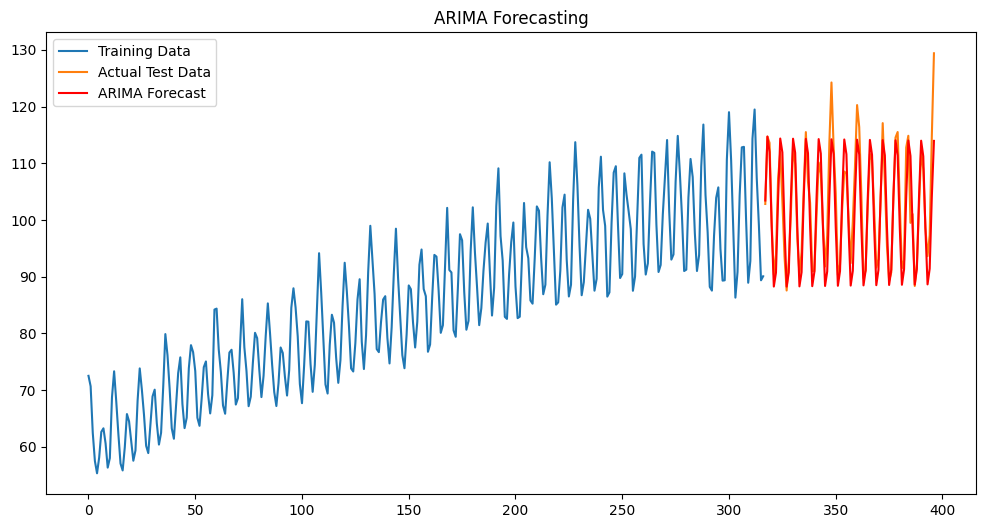

In [ ]:
forecast = model_fit.forecast(steps=len(test), alpha=0.05)

# Evaluate the model
rmse = sqrt(mean_squared_error(test, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(forecast, label='ARIMA Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecasting')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
df1 = pd.read_csv("/content/Electric_Production (1).csv")

# Assuming the dataset has a 'Date' and 'Demand' column
df1['DATE'] = pd.to_datetime(df['DATE'])
df1 = df.sort_values(by='DATE')

# Create lagged features for time series forecasting
df1['Demand_Lag1'] = df1['IPG2211A2N'].shift(1)
df1['Demand_Lag2'] = df1['IPG2211A2N'].shift(2)
df1['Demand_Lag3'] = df1['IPG2211A2N'].shift(3)

# Drop missing values resulting from the lag operation
df1 = df1.dropna()

# Split the data into features (X) and target variable (y)
X = df1[['Demand_Lag1', 'Demand_Lag2', 'Demand_Lag3']]
y = df1['IPG2211A2N']

Root Mean Squared Error (RMSE): 5.031235810480879


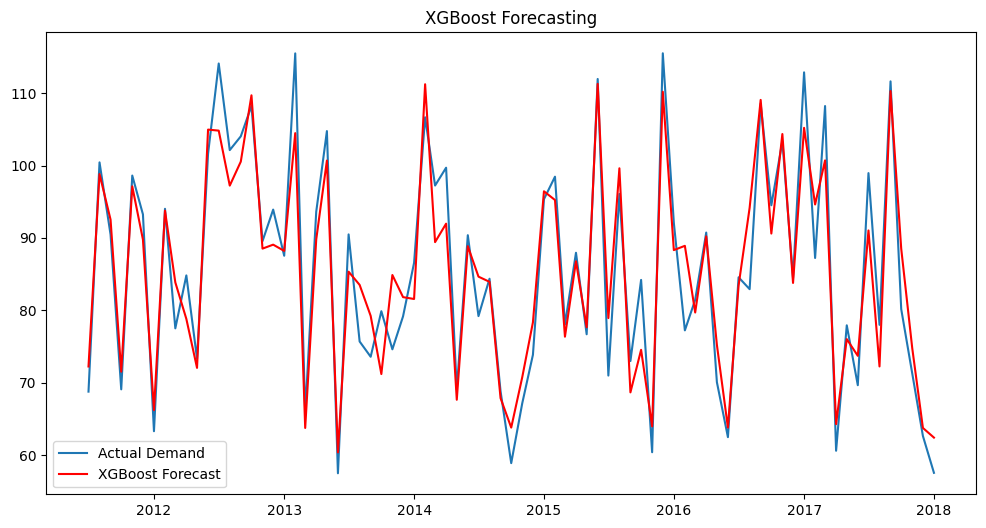

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost regressor
model = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
rmse = sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'].iloc[len(df)-len(X_test):], y_test, label='Actual Demand')
plt.plot(df['DATE'].iloc[len(df)-len(X_test):], predictions, label='XGBoost Forecast', color='red')
plt.legend()
plt.title('XGBoost Forecasting')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
df2 = pd.read_csv("/content/Electric_Production (1).csv")

# Assuming the dataset has a 'Date' and 'IPG2211A2N' column
df2['DATE'] = pd.to_datetime(df2['DATE'])
df2 = df2.sort_values(by='DATE')

# Create lagged features for time series forecasting
df2['Demand_Lag1'] = df2['IPG2211A2N'].shift(1)
df2['Demand_Lag2'] = df2['IPG2211A2N'].shift(2)
df2['Demand_Lag3'] = df2['IPG2211A2N'].shift(3)

# Drop missing values resulting from the lag operation
df2 = df2.dropna()

# Split the data into features (X) and target variable (y)
X2 = df2[['Demand_Lag1', 'Demand_Lag2', 'Demand_Lag3']]
y2 = df2['IPG2211A2N']

# Standardize the features
scaler2 = StandardScaler()
X_scaled2 = scaler2.fit_transform(X2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


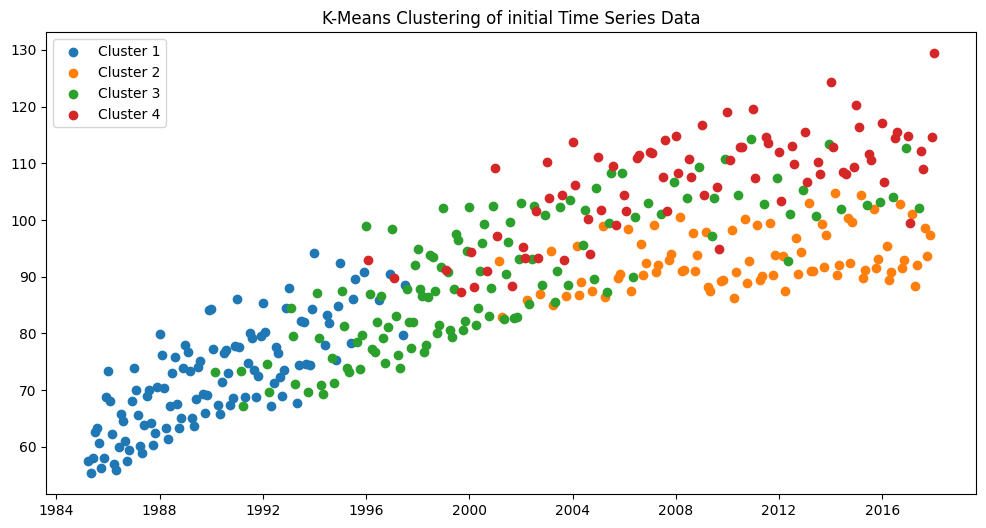

Root Mean Squared Error (RMSE): 3.0649320644831968


In [ ]:
# Specify parameters
k2 = 4  # Number of clusters
update_interval2 = 4  # Update clusters every 12 time steps

# Initialize K-Means model
kmeans2 = KMeans(n_clusters=k2, random_state=42)

# Initial clustering
clusters2 = kmeans2.fit_predict(X_scaled2)

# Store initial cluster assignments
df2['Cluster'] = clusters2
plt.figure(figsize=(12, 6))
for cluster_id in range(k2):
    cluster_data = df2[df2['Cluster'] == cluster_id]
    plt.scatter(cluster_data['DATE'], cluster_data['IPG2211A2N'], label=f'Cluster {cluster_id + 1}')

plt.legend()
plt.title('K-Means Clustering of initial Time Series Data')
plt.show()
# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize XGBoost model
model2 = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the initial model on the entire dataset
model2.fit(X2, y2)
predictions2 = model2.predict(X_test2)
rmse2 = sqrt(mean_squared_error(y_test2, predictions2))
print(f'Root Mean Squared Error (RMSE): {rmse2}')

In [ ]:



# Iterate through the time series data and update clusters and model
for i2 in range(update_interval2, len(df2), update_interval2):
    # Select the most recent data for updating
    recent_data2 = df2.iloc[i2 - update_interval2:i2]

    # Update clusters based on the recent data
    recent_X2 = recent_data2[['Demand_Lag1', 'Demand_Lag2', 'Demand_Lag3']]
    recent_X_scaled2 = scaler2.transform(recent_X2)
    recent_clusters2 = kmeans2.predict(recent_X_scaled2)

    # Update cluster assignments in the main dataframe
    df2.iloc[i2 - update_interval2:i2, -1] = recent_clusters2

    # Train a new model on the updated cluster
    for cluster_id2 in range(k2):
        cluster_mask2 = (df2['Cluster'] == cluster_id2)
        cluster_X2 = df2.loc[cluster_mask2, ['Demand_Lag1', 'Demand_Lag2', 'Demand_Lag3']]
        cluster_y2 = df2.loc[cluster_mask2, 'IPG2211A2N']

        # Train the XGBoost model on the data for the current cluster
        model2.fit(cluster_X2, cluster_y2)

# Evaluate the model on the test set
predictions2 = model2.predict(X_test2)
rmse2 = sqrt(mean_squared_error(y_test2, predictions2))
print(f'Root Mean Squared Error (RMSE): {rmse2}')



Root Mean Squared Error (RMSE): 18.13956892550524
